In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [89]:
data = pd.read_excel("/Users/amaterasu/Downloads/data.xlsx")

In [90]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [91]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

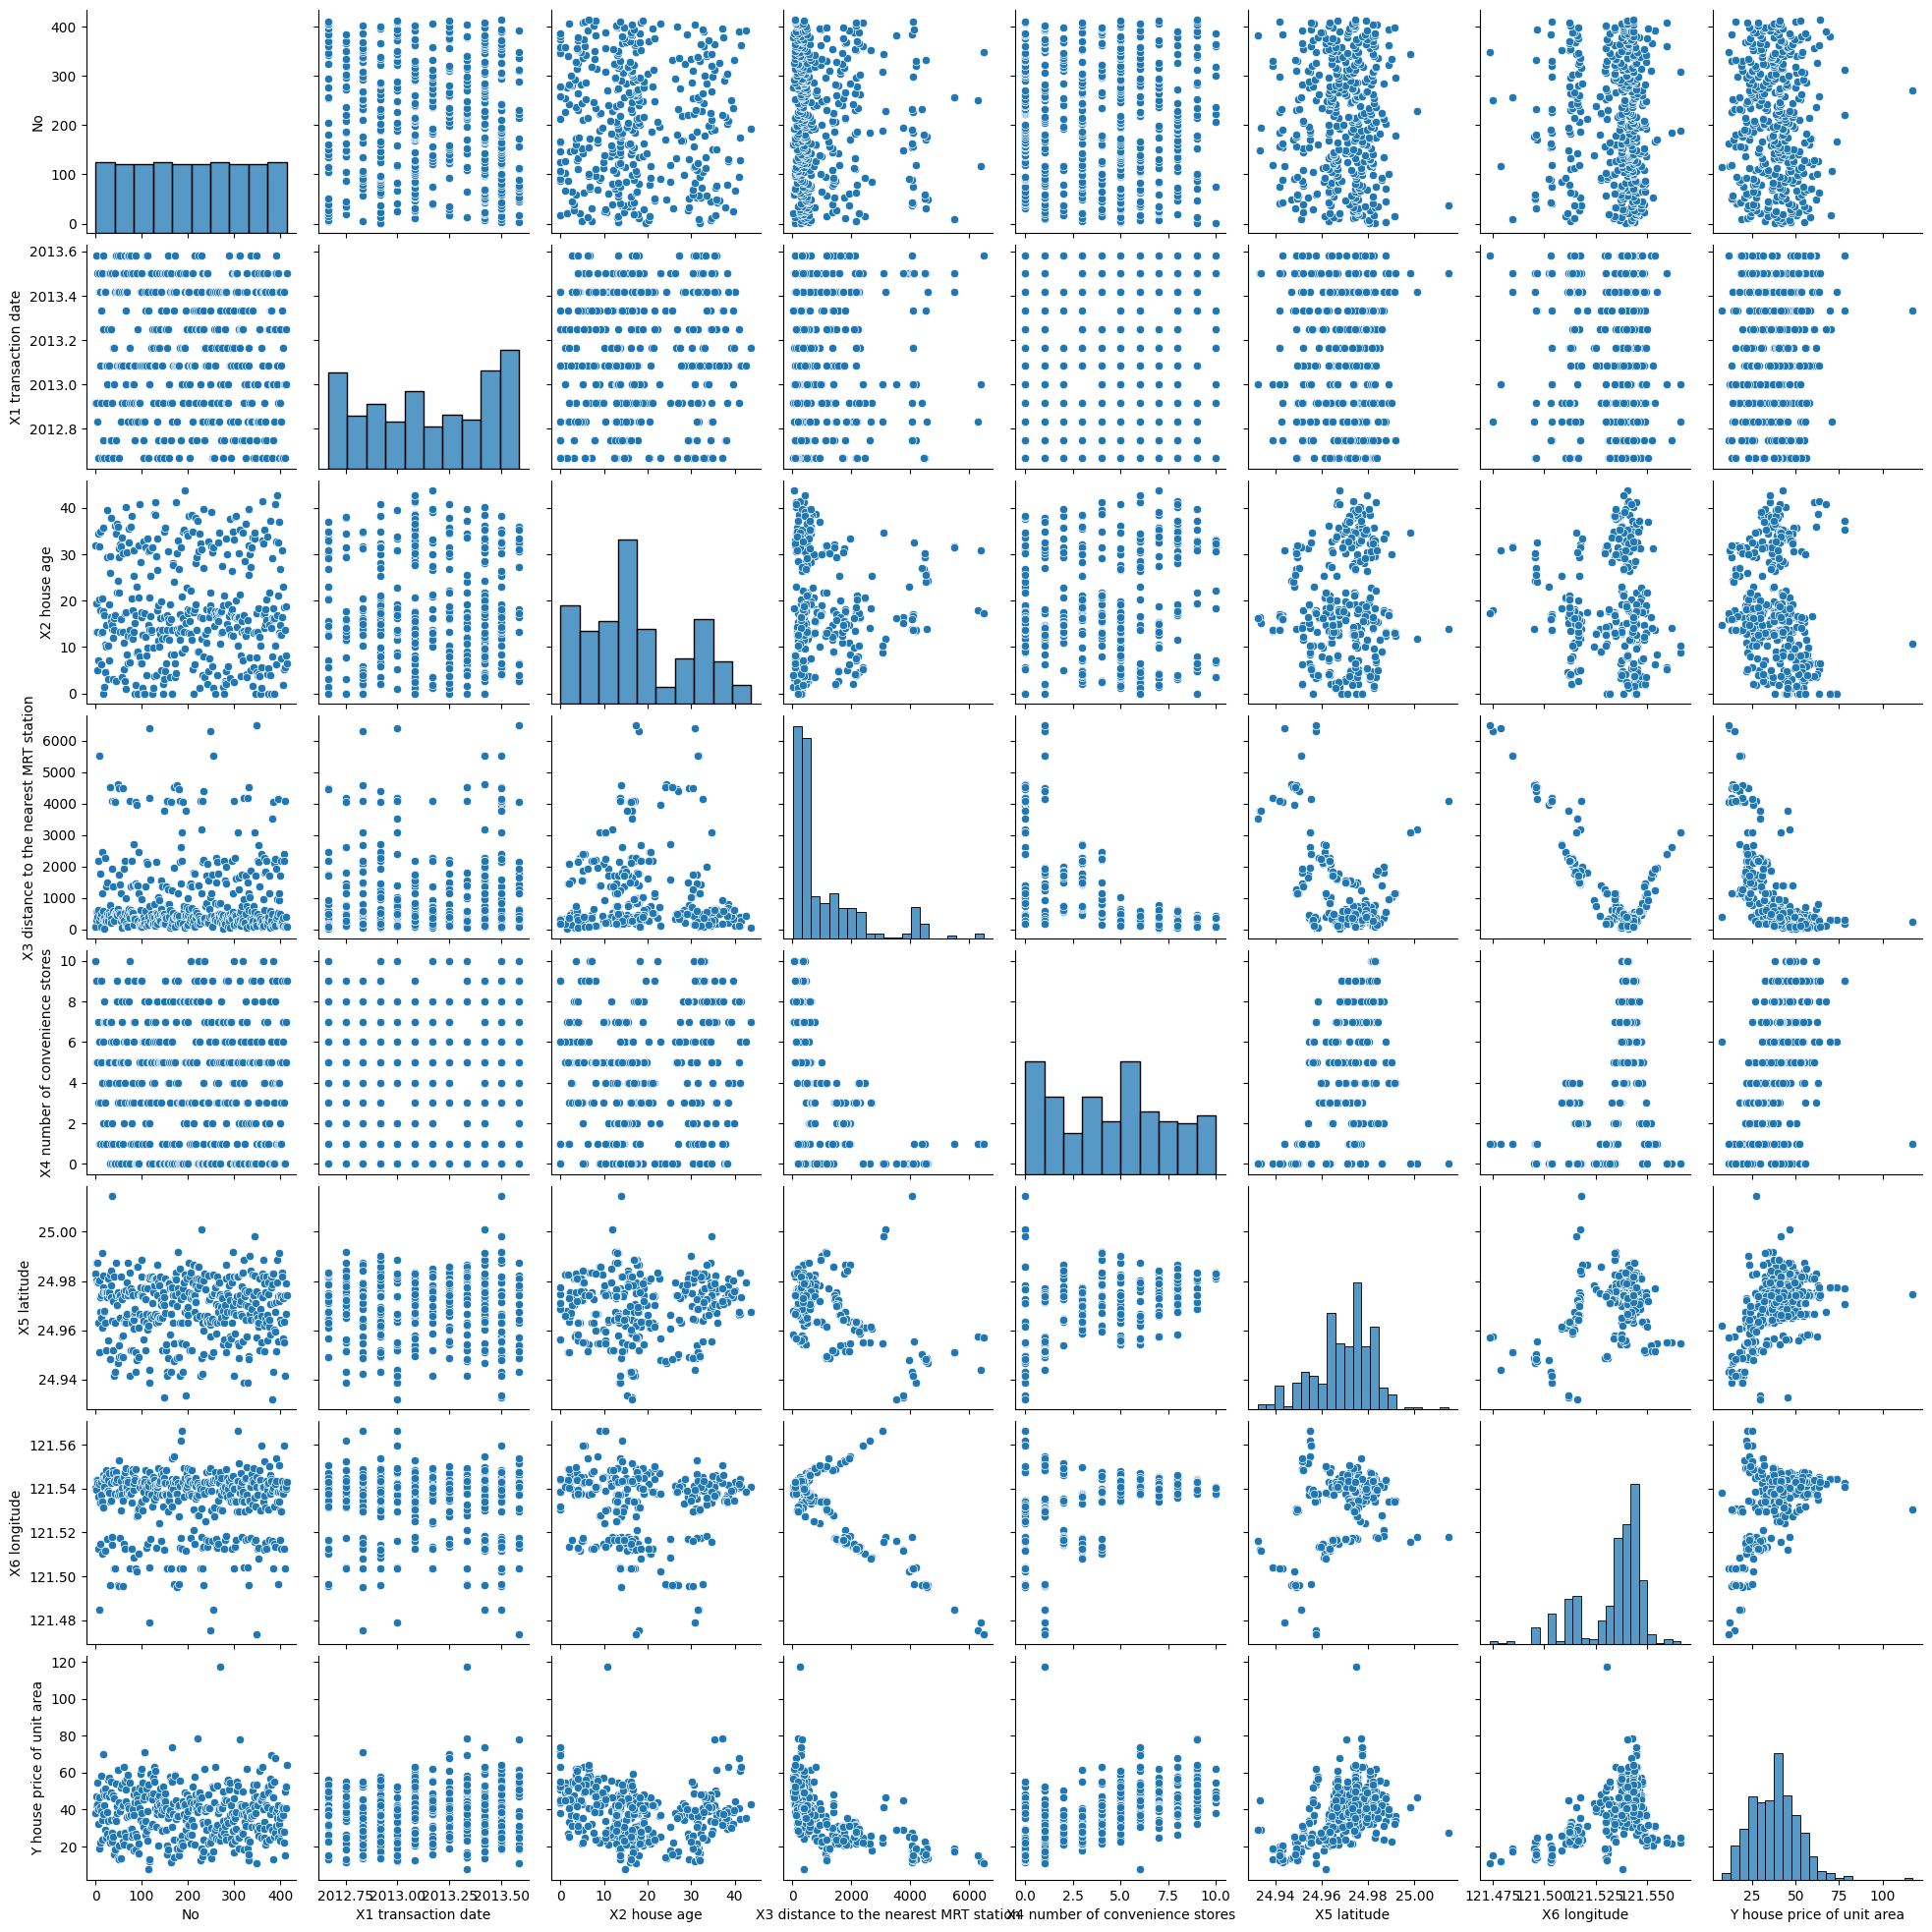

In [92]:
sns.pairplot(data)

<AxesSubplot: >

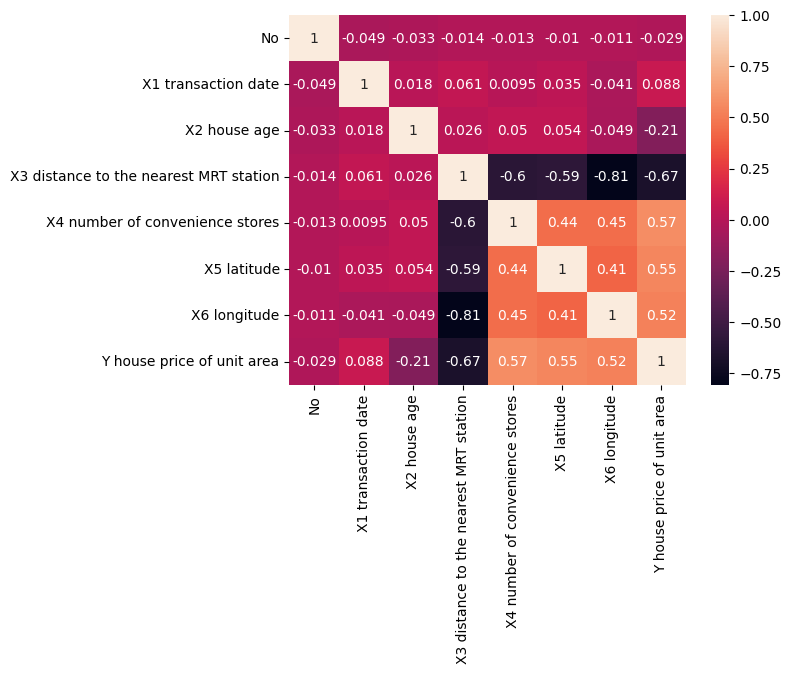

In [93]:
sns.heatmap(data.corr(),annot=True)

In [94]:
X = data.drop("Y house price of unit area", axis=1)
y=data['Y house price of unit area']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
No,-0.005617
X1 transaction date,5.410022
X2 house age,-0.267831
X3 distance to the nearest MRT station,-0.004815
X4 number of convenience stores,1.081187
X5 latitude,226.054506
X6 longitude,-30.136339


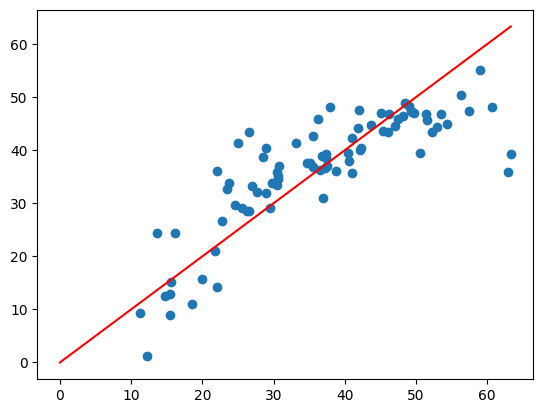

In [98]:
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)
max_value = max(y_test.max(), predictions.max())
plt.plot([0, max_value], [0, max_value], color='r')


In [99]:
y_pred = lm.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 54.598848304985864
R-squared: 0.6745414195692494


In [100]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
print(results)

     Actual Prices  Predicted Prices
358           45.1         47.044774
350           42.3         40.407464
373           52.2         43.376288
399           37.3         39.203583
369           22.8         26.625215
..             ...               ...
31            25.0         41.373355
283           23.5         32.650541
157           35.6         42.608902
203           46.1         43.395820
208           26.2         28.507189

[83 rows x 2 columns]
